In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [3]:
audiocategory='breathing-deep,breathing-shallow,cough-heavy,cough-shallow,vowel-a,vowel-e,vowel-o,counting-normal,counting-fast'

In [4]:
results_folder = 'results'
classifier_name = 'RandomForest'
pred_path = os.path.join(results_folder, classifier_name, 'y_pred.npy')
true_path = os.path.join(results_folder, classifier_name, 'y_true.npy')
pred_proba_path = os.path.join(results_folder, classifier_name, 'y_pred_proba.npy')

y_pred = np.load(pred_path)
y_true = np.load(true_path)
y_proba = np.load(pred_proba_path)

In [5]:
y_pred.shape

(5777,)

confusion matrix:
 [[310 220  35  63   0   4   4  21   6]
 [304 225  39  64   1   4   1  21   6]
 [ 40  38 323 186   3   1   2  26  13]
 [ 44  40 228 277   2   1   3  30   9]
 [  4   6   8  15 345  94  29  44  57]
 [ 10  13   6   6  47 567  28  31  24]
 [  4   4   5   3  12  15 518  21  28]
 [  8   7  12  42   8  18  19 380 149]
 [  6   6  10  11  23  15  23 185 317]]


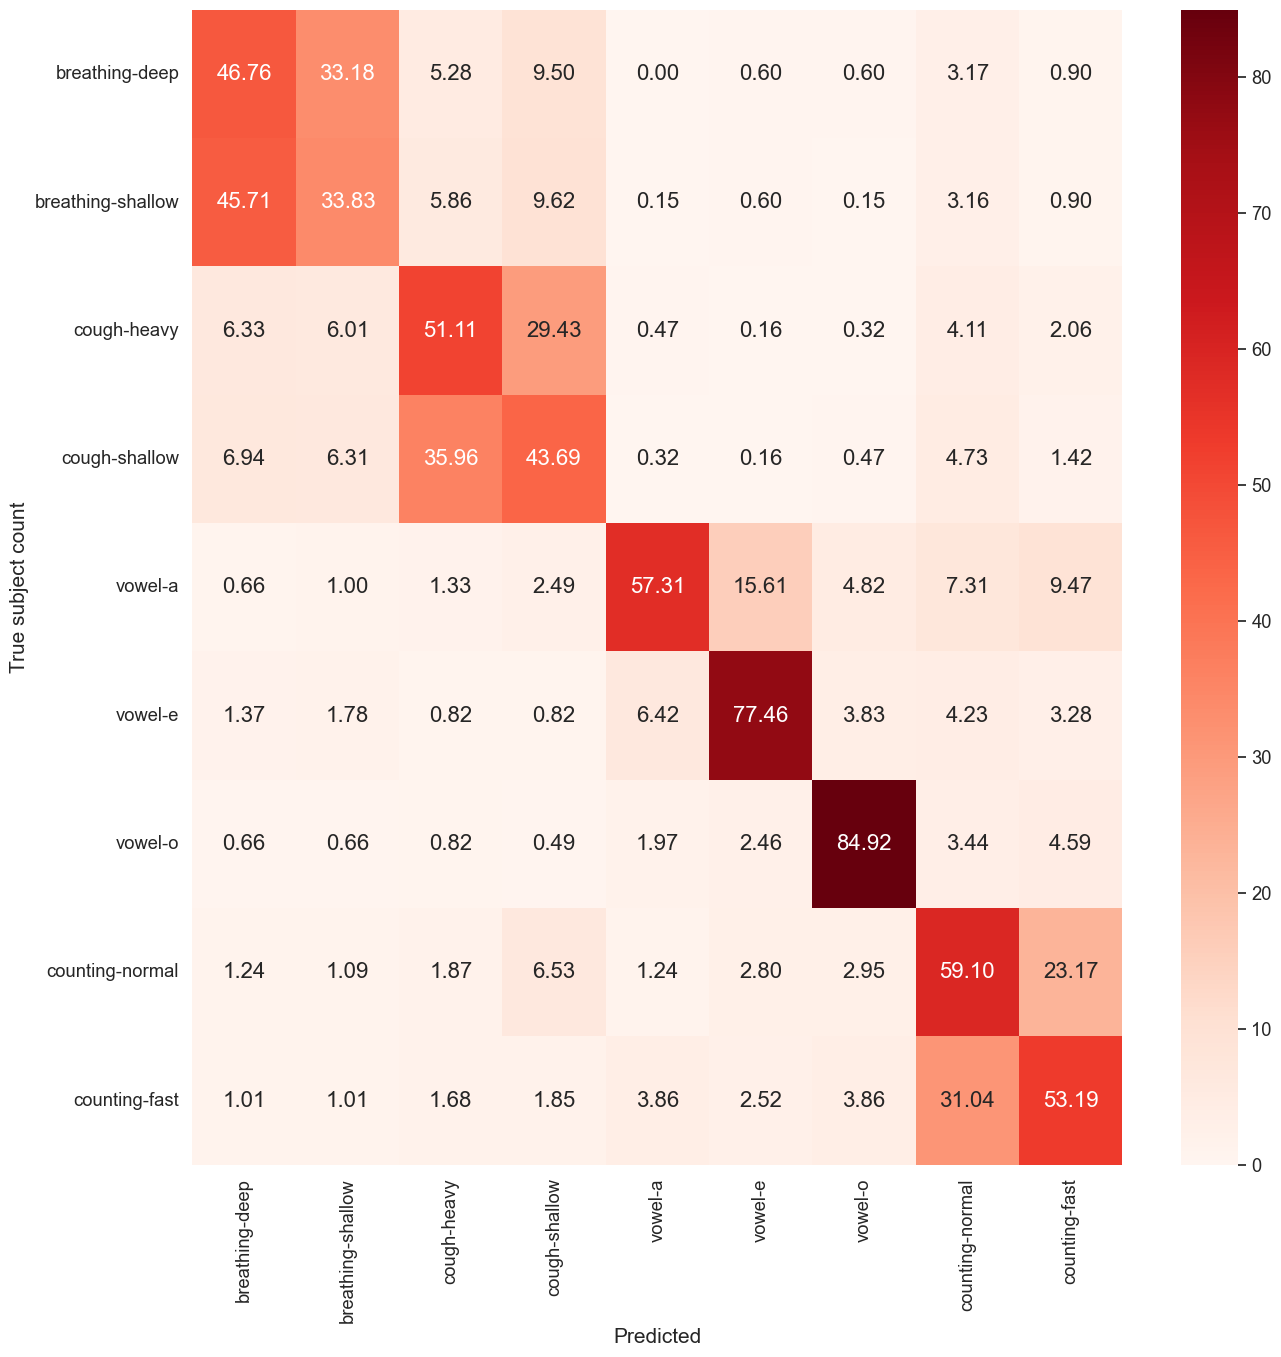

In [6]:
cm = confusion_matrix(y_true, y_pred)
print(f'confusion matrix:\n {cm}')

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmn = cmn*100
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=audiocategory.split(','), yticklabels=audiocategory.split(','), annot_kws={"size": 16}, cmap="Reds")
#sns.heatmap(cmn, annot=cm,fmt="d", xticklabels=audiocategory.split(','), yticklabels=audiocategory.split(','), annot_kws={"size": 15}, cmap="Reds")
plt.ylabel('True subject count', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.savefig(os.path.join(results_folder, classifier_name, 'confusion_matrix.jpg'))
plt.show()